In [ ]:
import numpy as np
from keras.datasets import fashion_mnist
from random import random
from sklearn.utils import shuffle
import math
import matplotlib.pyplot as plt

In [ ]:
class RBMContrastiveDivergence:
    def __init__(self,num_visible_nodes,num_hidden_nodes,k,learning_rate,num_epochs):
        self.num_visible_nodes=num_visible_nodes
        self.num_hidden_nodes=num_hidden_nodes
        self.k=k
        self.W= np.random.randn(num_visible_nodes,num_hidden_nodes)*np.sqrt(2./(num_hidden_nodes+num_visible_nodes))
        self.c=np.zeros((1,num_hidden_nodes))
        self.b=np.zeros((1,num_visible_nodes))
        self.learning_rate=learning_rate
        self.num_epochs=num_epochs

    def sample_v(self,h):
        temp=h@self.W.T
        temp=temp+self.b
        prob_v_given_h=self.activation(temp)
        return (np.random.uniform(size=prob_v_given_h.shape) < prob_v_given_h) * 1

    def activation(self, X):
        temp = np.where(X >= 0, 1 / (1 + np.exp(-X)), np.exp(X) / (1 + np.exp(X)))
        return temp

    def sample_h(self,v):
        temp = v @ self.W
        temp = temp + self.c
        prob_h_given_v = self.activation(temp)
        return (np.random.uniform(size=prob_h_given_v.shape) < prob_h_given_v) * 1

    def update_parameters(self,update_W,update_b,update_c):
        self.W+=self.learning_rate * update_W
        self.b+=self.learning_rate * update_b
        self.c+=self.learning_rate * update_c
        
    def schedule_lr(self,factor):
      self.learning_rate=self.learning_rate*factor         







In [ ]:
def load_dataset():
        (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
        X_train = X_train.reshape((X_train.shape[0], 784))
        X_train = X_train.astype('float64')
        X_train=np.where(X_train >= 127.0,1,0)
        X_val, y_val = X_train[48000:], y_train[48000:]
        X_train, y_train = X_train[:48000], y_train[:48000]
        X_test = X_test.reshape((X_test.shape[0], 784))
        X_test = X_test.astype('float64')
        X_test=np.where(X_test >= 127.0,1,0)
        return (X_train, y_train, X_val, y_val, X_test, y_test)

In [ ]:
num_visible_nodes=784
num_hidden_nodes=256
num_epochs=6
k=10
learning_rate=0.01
X_train,y_train,X_val,y_val,X_test,y_test=load_dataset()


In [ ]:
rbm=RBMContrastiveDivergence(num_visible_nodes=num_visible_nodes,num_hidden_nodes=num_hidden_nodes,k=k,learning_rate=learning_rate,num_epochs=num_epochs)

In [ ]:
samples=[]
true_images=[]
step=0
n=(int)(len(X_train)*rbm.num_epochs/(64))
for i in range(rbm.num_epochs):
  (X_train,y_train)=shuffle(X_train,y_train,random_state=0)
  for x in X_train:
      x=x.reshape((1,784))
      v=x
      update_W=np.zeros((rbm.num_visible_nodes,rbm.num_hidden_nodes))
      update_c=np.zeros((1,rbm.num_hidden_nodes))
      update_b=np.zeros((1,rbm.num_visible_nodes))
      for t in range(0,rbm.k):
          h=rbm.sample_h(v)
          v=rbm.sample_v(h)
      act = rbm.activation((v @ rbm.W)+ rbm.c)
      temp=rbm.activation((x @ rbm.W)+ rbm.c)
      update_W=(x.T @ temp)- (v.T @ act)
      update_b=x-v
      update_c=temp-act
      rbm.update_parameters(update_W,update_b,update_c)
      step=step+1
      if step%n==0:
        true_images.append(x)
        samples.append(v)
test_hidden_representation=rbm.sample_h(X_test)
  


4500


**Samples generated after contrastive divergence**



In [ ]:
def plot_samples(samples):
  plt.figure(figsize=(16,16))
  for i in range(64):
      plt.subplot(8,8,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(samples[i].reshape(28,28), cmap=plt.cm.binary)
  plt.show()

**True Samples**

In [ ]:
def plot_true_images(true_images):
  plt.figure(figsize=(16,16))
  for i in range(64):
      plt.subplot(8,8,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(true_images[i].reshape(28,28), cmap=plt.cm.binary)
  plt.show()

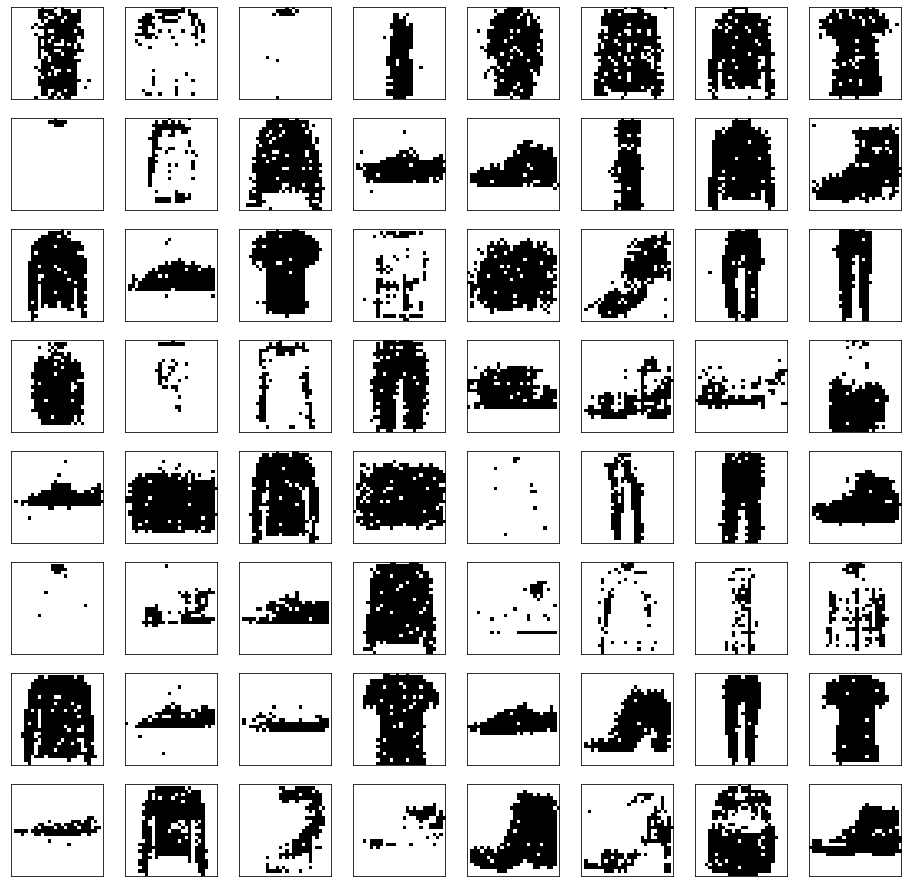

In [ ]:
plot_samples(samples)

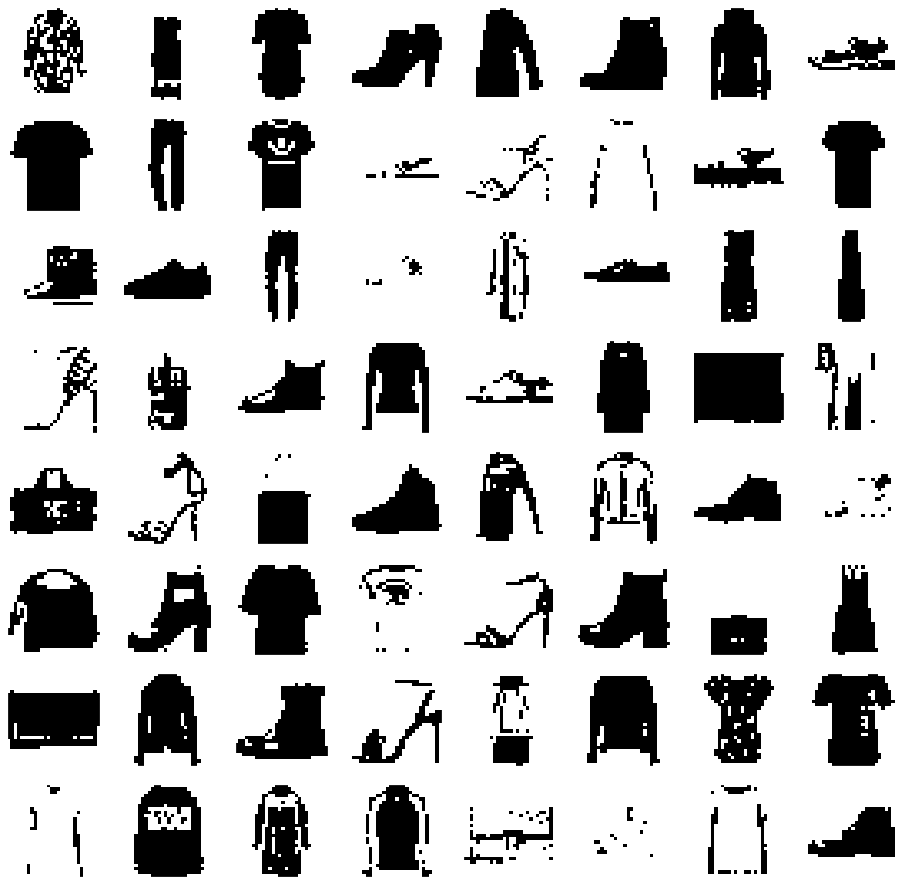

In [ ]:
plot_true_images(true_images)

**Visualisation**

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from sklearn.manifold import TSNE
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
RS = 123

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright",10)

In [ ]:
fashion_tsne = TSNE(random_state=RS).fit_transform(test_hidden_representation)

In [ ]:
y=[class_names[y_test[i]] for i in range(len(y_test))]

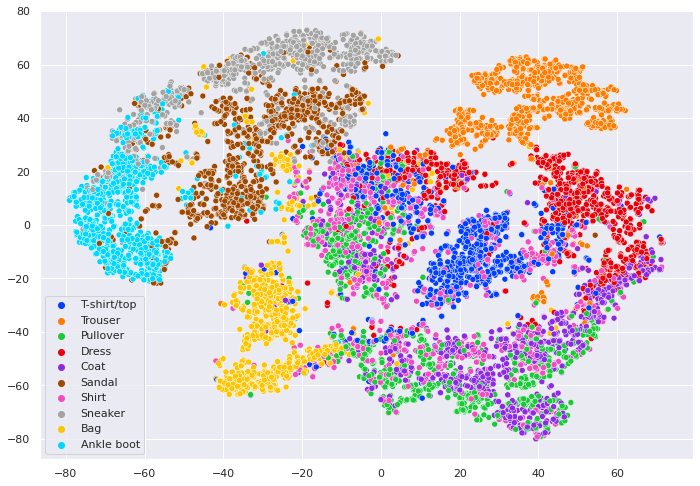

In [ ]:
sns.scatterplot(x=fashion_tsne[:,0],y=fashion_tsne[:,1],hue=y,hue_order=class_names,legend='full', palette=palette)